### Heart Disease Random Forest Example 
#### This is initially a copy of the decision tree notebook
The dataset is about a group of people, want to predict who has heart disease. There are 13 features. Data set is an old Kaggle one, the current ones on Kaggle are slightly different. 
The field target is what we are trying to predict, 1 if has heart disease, 0 if not, we are trying to determine this

In [83]:
import pandas as pd
import numpy as np

In [84]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [86]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(heart_data.drop(columns=['target']), heart_data['target'], test_size=0.2, random_state=1984)

In [89]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=2023)

In [90]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2023)

In [91]:
# the tree has already been trained,
accuracy_decision_tree = tree.score(X_test, y_test)

In [92]:
print("Decision Tree Accuracy: " + str(accuracy_decision_tree))

Decision Tree Accuracy: 0.7377049180327869


if you don't limit the depth get accuracy of 100%, if change max_depth accuracy in training drops a lot, but there is minimal drop in test data accuracy

In [93]:
tree.score(X_train, y_train) #if you don't limit the depth get accuracy of 100%, if change  max_depth accuracy in training drops

1.0

#### Test with KNN 

In [94]:
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors=1) #pass in the number of neighbors

In [95]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
knn_acc = KNN.score(X_test, y_test)
knn_acc

0.6721311475409836

In [98]:
#### Random Forest Start

In [99]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=2023, n_estimators=30) #n_estimators limits number of trees
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=2023)

In [100]:
forest_acc = forest.score(X_test, y_test)
forest_acc

0.8852459016393442

In [101]:
forest.score(X_train, y_train) 

1.0

In [102]:
forest.feature_importances_

array([0.08288346, 0.02345801, 0.13543879, 0.07036553, 0.07973825,
       0.01001127, 0.0172513 , 0.13360952, 0.05340094, 0.09921931,
       0.07170828, 0.10570899, 0.11720633])

In [103]:
import matplotlib.pyplot as plt


In [104]:
#X_train.shape #rows an cols
n_features = X_train.shape[1]

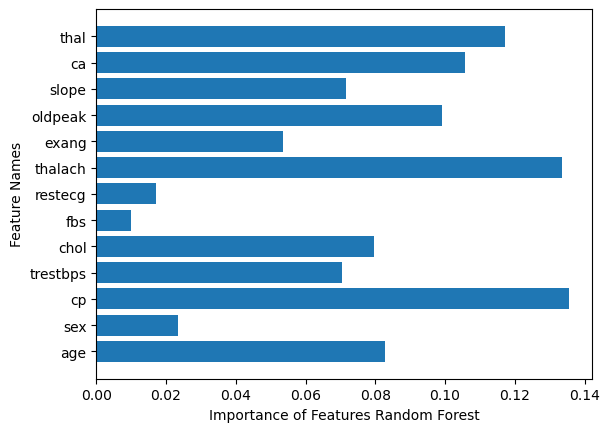

In [105]:
plt.barh(range(n_features), forest.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
plt.xlabel("Importance of Features Random Forest")
plt.ylabel("Feature Names")
plt.show()


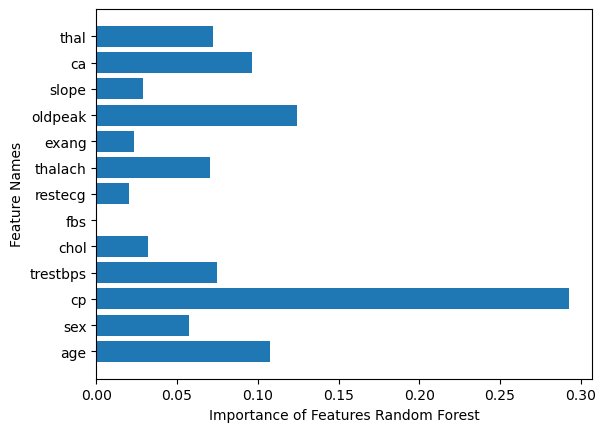

In [107]:
plt.barh(range(n_features), tree.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
plt.xlabel("Importance of Features Random Forest")
plt.ylabel("Feature Names")
plt.show()